<a href="https://colab.research.google.com/github/DevendraChoudhary15/thermofluids/blob/main/code_psychrometric_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Write a code to recreate the psychrometric chart by plotting constant a) specific volume lines, b) relative humidity lines and c) specific enthalpy lines with dry bulb temperature varying between 5◦C and 50◦C and specific humidity varying between 0 and 0.03 Kg/Kg dry air. The constant lines for the above mentioned properties should be drawn at the following values 
(a) 0.80, 0.85, 0.90 and 0.95 m3/Kg dry air 
(b) 10% to 100% at intervals of 10 percent 
(c) corresponding to WBT varying from 5◦C to 30◦C at intervals of 5 degrees 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:111: MatplotlibDeprecationWarning: Unrecognized location 'uppercenter'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


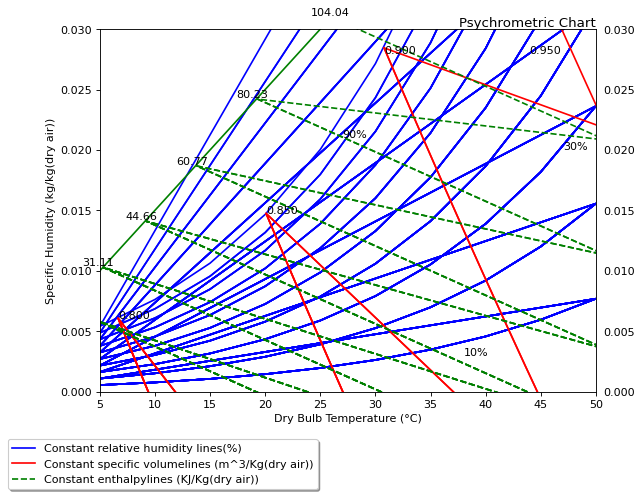

In [11]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
from math import exp
#constants
P_pa = 101325 #atmospheric pressure in Pa
R = 287.058 # Gas Constant for air in J/kg*K
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
#Given values range
relative_humidity = np.arange(start=0.1, stop = 1.1, step = 0.1)
#relative humidity
specific_volume = [0.8, 0.85, 0.9, 0.95] #specific volume DBT =
np.arange(start=5, stop=51, step=5) #Dry Bulb Temperature steps 5
#function to find saturation pressure
#Use Clausius Claperyon equation for water to calculate the saturation properties
def p_sat(t):
    return 1000*(0.61094*(mt.exp(  (17.625*(t))/(t+243.04))))
# x and y arrays for plotting
x = []
y = []
k = 1
#loop for plotting constant relative humidity lines using W = 0.622 P/P-ps
for i in range(0,len(relative_humidity)):
  fi = relative_humidity[i]
  for j in range(0,len(DBT)):
    W = 0.622/((P_pa/(p_sat(DBT[j])*fi)) -1)
    y.append(W)
    x.append(DBT[j])
  if k==0:
   plt.plot(x,y,color='blue')
  else:
    plt.plot(x,y,color='blue', label='Constant relative humidity lines(%)')
    k=0
x.clear()
y.clear()
# Plotting Constant specific volume lines
k=1
DBT_sec = np.arange(start=5, stop=51, step=0.001) #steps 0.001
for i in range(0,len(specific_volume)):
  fi = 1
  v = specific_volume[i]
  for j in range(0,len(DBT_sec)):
    lengt = len(DBT_sec) -1 -j
    tem = DBT_sec[lengt] + 273
    W = 0.622*((P_pa*v)/(R*tem)-1)
    if P_pa-R*tem/v <p_sat(tem-273):
      y.append(W)
      x.append(DBT_sec[lengt])
    else:
      W1 = min(.622/( (P_pa/(p_sat(DBT_sec[lengt])*fi)) -1), .028)
      if v!=0.95:
        plt.text(DBT_sec[lengt],W1,'%.3f'%v)
      else:
        plt.text(44,W1,'%.3f'%v)
      break
  if k==0:
   plt.plot(x,y,color='red',linestyle='-')
  else:
    plt.plot(x,y,color='red',linestyle='-',label='Constant specific volumelines (m^3/Kg(dry air))')
    k=0
x.clear()
y.clear()
#Plotting constant enthalpy lines using h = 1.0216t + 2500W
k=1
DBT_sec = np.arange(start=5, stop=51, step=.1)
h = []
#WBT 5 to 35 at intervals of 5 degrees
temp = np.arange(start=5, stop=31, step=5)
for i in range(0,len(temp)):
  W = 0.622/((P_pa/p_sat(temp[i]))-1)
  enthalpy = (1.206*(DBT[i])+ 2500*W)
  h.append(enthalpy)
h = np.array(h)
for i in range (0,len(DBT_sec)):
  W = (DBT_sec[i]+5)/1000
  y.append(W)
  x.append(DBT_sec[i])
plt.plot(x,y,color='green')
x.clear()
y.clear()
for i in range(0,len(h)):
  h_dash = h[i]
  for j in range(0,len(DBT_sec)):
    lengt = len(DBT_sec)-1-j
    W = (h_dash -1.0216*DBT_sec[lengt])/2500
    if(W*1000<=5+DBT_sec[lengt]):
      y.append(W)
      x.append(DBT_sec[lengt])
    elif W<0.25:
      plt.text(DBT_sec[lengt]-1.8,W+0.0001, '%.2f' %h_dash)
      break
  if k==0:
   plt.plot(x,y,color='green',linestyle='--')
  else:
    plt.plot(x,y,color='green',linestyle='--', label='Constant enthalpylines (KJ/Kg(dry air))')
    k=0
x.clear()
y.clear()
plt.text(38,0.003,'10%')
plt.text(47,0.020,'30%')
plt.text(27,0.021,'90%')
plt.ylim(0,0.03) #limit of y axis
plt.xlim(5,50) #limit of x axis
plt.xlabel('Dry Bulb Temperature (°C)')
#plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
#plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False
plt.ylabel('Specific Humidity (kg/kg(dry air))')
plt.title('Psychrometric Chart', fontsize=12, loc='right', pad = '0.2')
plt.tick_params(axis='y',which='both',labelleft=1, labelright=1)
plt.legend(loc='uppercenter',bbox_to_anchor=(0.45,-.2),shadow='True',ncol=1)
plt.show()
